In [18]:
import numpy as np
import pandas as pd

from IPython.display import clear_output

import matplotlib.pyplot as plt
import matplotlib.animation as ani

In [37]:
df = pd.read_csv("./data/signals.csv").drop("Unnamed: 0", axis = 1)
df = df.iloc[0:-1]
df["SOC1"] = df["SOC1"]*100
df["SOC2"] = df["SOC2"]*100
df["SOC3"] = df["SOC3"]*100

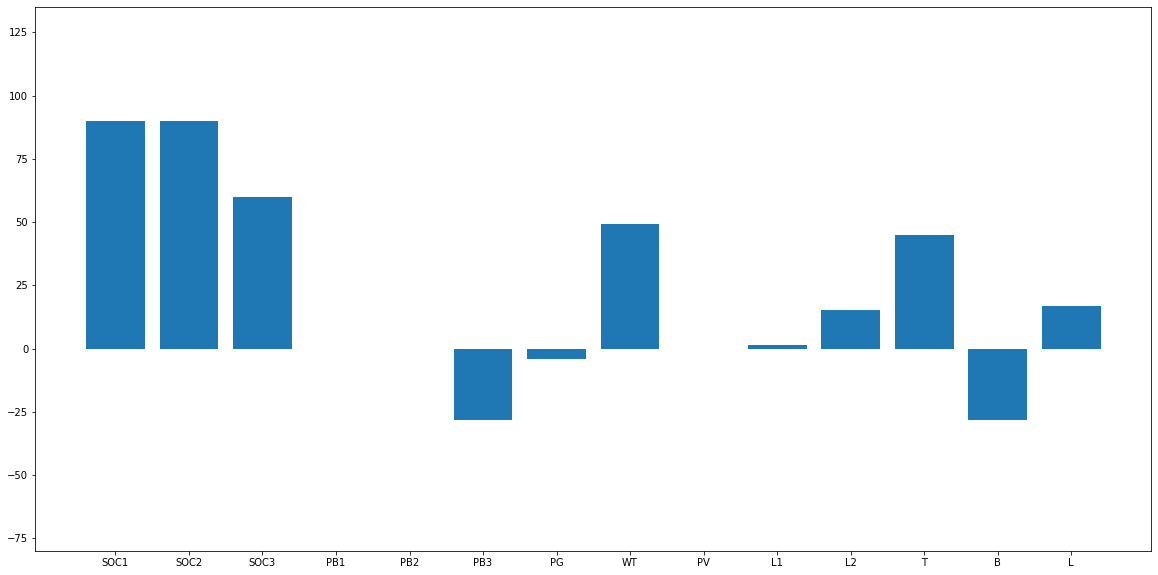

In [42]:
import time
for i in range(df.shape[0]):
    time.sleep(0.4)
    clear_output(wait=True)
    test = df.loc[i]
    plt.figure(figsize = (20, 10))
    plt.bar(test.index, test.values)
    plt.ylim([-80, 135])
    plt.show()

Index(['SOC1', 'SOC2', 'SOC3', 'PB1', 'PB2', 'PB3', 'PG', 'WT', 'PV', 'L1',
       'L2', 'T', 'B', 'L'],
      dtype='object')

In [63]:
import networkx as nx
import matplotlib.animation as ani

In [419]:

class GraphViz():
    def __init__(self, figsize = (10, 5)):

        self.figsize = figsize
        self.font_size = sum(figsize)
        
        self.nodes = ["WT", "PV", "G", "T", "B", "L", "L1", "L2", "B1", "B2", "B3", " "]
        self.batteries = [("B1", "B", {"name": "PB1"}), ("B2", "B", {"name": "PB2"}), ("B3", "B", {"name": "PB3"})]
        self.topology = [("T", " ",{"name": "T"}), ("B", " ",{"name": "B"}), ("L", " ", {"name": "L"})]
        self.res = [("WT", "T",{"name": "WT"}), ("PV", "T",{"name": "PV"}),  ("G", "T",{"name": "PG"})]
        self.loads = [("L1", "L", {"name": "L1"}), ("L2", "L", {"name": "L2"})]
            
        self.G = nx.Graph()
        self.G.add_nodes_from(self.nodes)
        self.G.add_edges_from(self.batteries)
        self.G.add_edges_from(self.topology)
        self.G.add_edges_from(self.res)
        self.G.add_edges_from(self.loads)
        
        self.edges = self.G.edges()
        
        
        self.pos = nx.kamada_kawai_layout(self.G)
        
        self.edge_colors = ["k"]*n_edges
        self.weights = [2]*n_edges


    def update_edges(self, data):
        
        self.edge_colors = []
        self.weights = []
        
        edge_dict = nx.get_edge_attributes(self.G, "name")
        
        for edge, name in edge_dict.items():
            value = data[name]
            

            if value >= 0:
                color = "pink"
            else:
                color = "cyan"
                
            nx.set_edge_attributes(self.G, {edge:  {"color": color, "weight": np.ceil(abs(value)/5)}})

        self.edge_colors = list(nx.get_edge_attributes(self.G, "color").values())
        self.weights = list(nx.get_edge_attributes(self.G, "weight").values())
        
    def draw(self):
        nx.draw(self.G, self.pos, with_labels = True, edge_color= self.edge_colors, width = self.weights, font_size = self.font_size, node_size = 4000, node_color = "w")


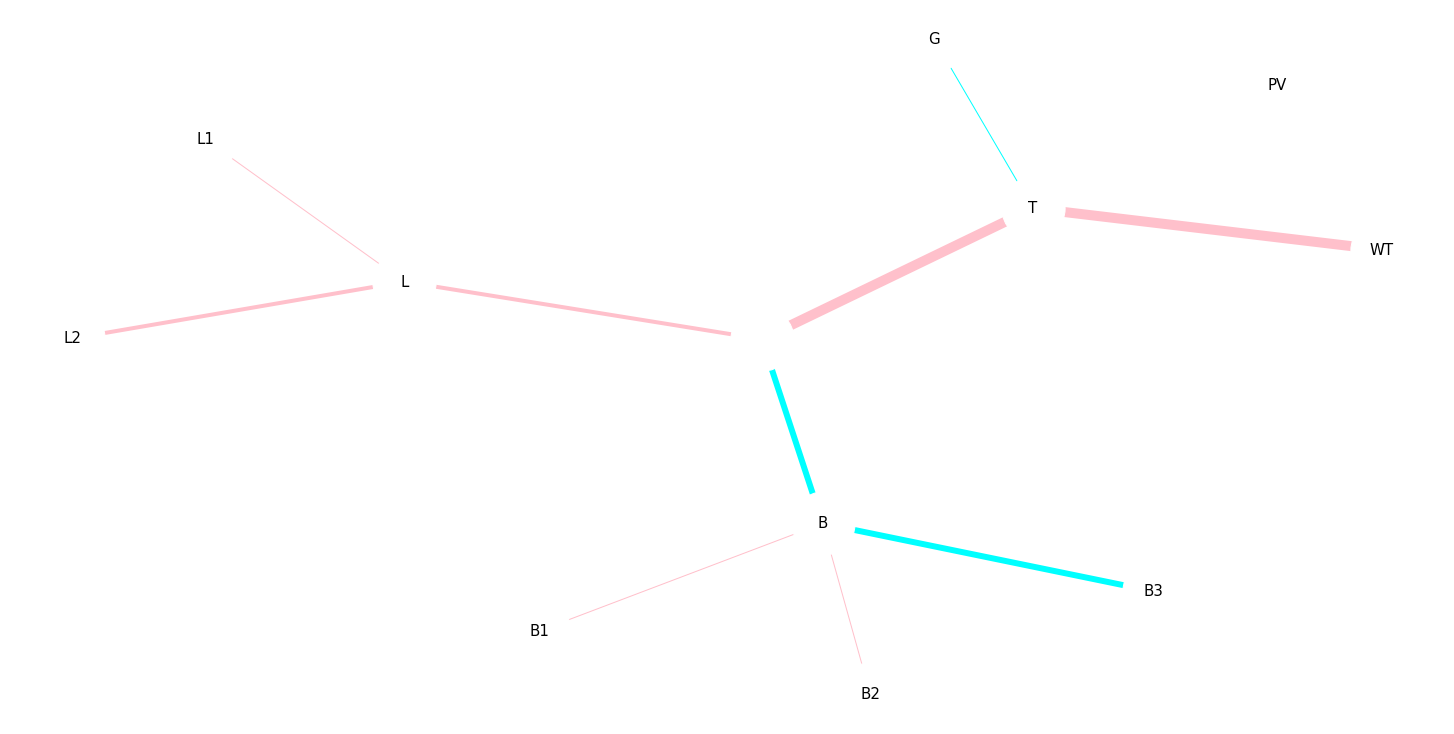

In [424]:

plt.figure(figsize=(20,10))

g = GraphViz()

for i in range(0,animate_df.shape[0]):
    clear_output(wait=True)
    datapoint = animate_df.loc[i][3:]
    g.update_edges(datapoint)
    plt.figure(figsize=(20,10))
    g.draw()
    plt.show()
    #print("Time: {}.00".format(int(i/6)))
    time.sleep(0.2)
    

MovieWriter PillowWriter unavailable; using Pillow instead.


KeyError: 22

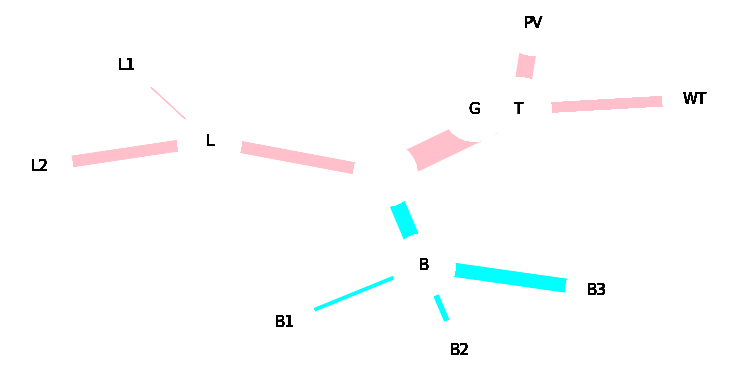

In [407]:
animate_df = df.iloc[::6].reset_index(drop=True)

def animate_graph(i):
    datapoint = animate_df.loc[i][3:]
    g.update_edges(datapoint)
    g.draw()

fig = plt.figure(figsize = (10, 5))
animate = ani.FuncAnimation(fig, animate_graph, frames = 23)
animate.save("./test.gif", writer='PillowWriter', fps=2)
plt.show()

In [395]:
animate_df

,SOC1,SOC2,SOC3,PB1,PB2,PB3,PG,WT,PV,L1,L2,T,B,L
0,70.000000,30.000000,30.000000,-10.480796,-10.480796,-10.480796,-1.497257,49.067493,0.000000,1.029876,15.097973,47.570236,-31.442387,16.127849
1,71.677568,32.684110,59.773961,-10.524251,-10.524251,-10.524251,-1.503464,49.067493,0.000000,1.075000,14.916275,47.564029,-31.572754,15.991275
2,73.408847,35.454155,59.773675,-10.481136,-10.481136,-10.481136,-1.497305,49.067493,0.000000,1.083448,15.043333,47.570188,-31.443407,16.126781
3,75.200253,38.320405,59.773415,-11.839262,-11.839262,-11.839262,-1.691323,49.067493,4.716402,1.225980,15.348806,52.092572,-35.517786,16.574786
4,77.283420,41.653472,59.773206,-14.104334,-14.104334,-14.104334,-2.014905,49.067493,15.335914,1.080208,18.995290,62.388502,-42.313003,20.075499
5,79.248574,44.797718,59.772966,-9.856593,-9.856593,-9.856593,-1.408085,49.067493,16.401112,1.506250,32.984491,64.060521,-29.569780,34.490741
6,81.106800,47.770880,59.772680,-11.159902,-11.159902,-11.159902,-1.594272,49.067493,26.437040,2.055446,38.375109,73.910262,-33.479706,40.430556
7,83.905520,52.248832,59.752119,-18.737724,-20.924640,-20.924640,-2.989234,49.067493,58.894608,1.799881,42.585981,104.972867,-60.587005,44.385862
8,86.375264,58.099456,59.997076,-10.050844,-23.227447,-23.227447,-3.318207,49.067493,66.039392,2.353371,52.929571,111.788679,-56.505737,55.282942
9,87.849501,64.772063,60.000000,-6.111199,-25.857268,-25.857268,-3.693895,49.067493,68.044730,1.967308,53.625285,113.418328,-57.825735,55.592593
